<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/reza-bagheri/SVD_article/tree/master/.ipynb_checkpoints

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
The size of the matrix is:  480  x  423


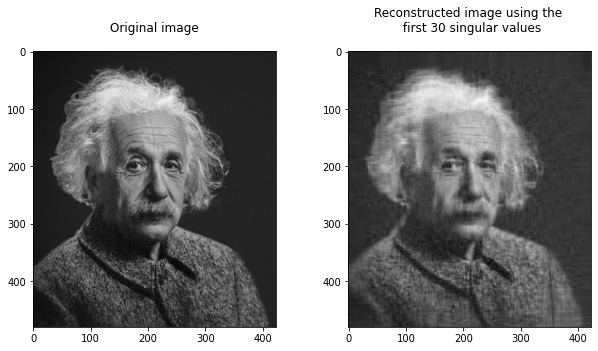

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import linalg as LA
from google.colab import drive
from google.colab import files

np.set_printoptions(threshold=10)

#mount your google drive to google colab
drive.mount('/content/drive/')

#since the code will be run on a virtual machine, we need to copy the python file to that machine in order to run it
!cp /content/drive/My\ Drive/Code/MyPython/PHYS411/Extra/photo.png .
!cp /content/drive/My\ Drive/Code/MyPython/PHYS411/Extra/shapes.png .

# Reading the image
mat = plt.imread("photo.png")
print("The size of the matrix is: ", mat.shape[0], " x ", mat.shape[1])

# SVD 
U, s, VT = LA.svd(mat)

# find the eigenvalues
Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 30
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.05)

plt.show()

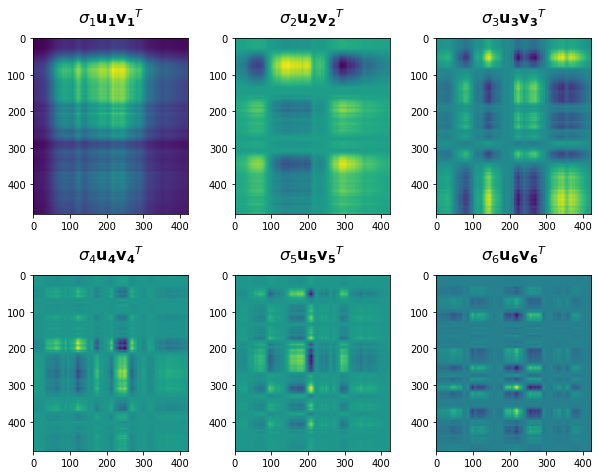

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()

## analyzing the shapes image

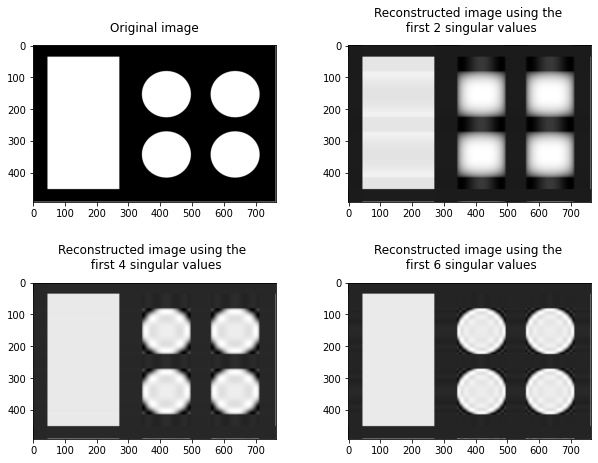

In [ ]:
# Reading the image
mat = plt.imread("shapes.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image", y=1.05)

for i in range(1, 4):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.05)

plt.show()

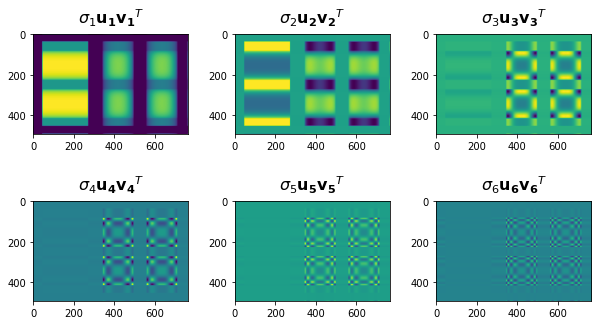

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.05)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    #mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()